## Import libraries

In [116]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, LabelBinarizer
from scipy.stats import zscore

## Get the data

In [117]:
df = pd.read_csv("../../../datasets/parte2/teste/dataset.csv")
dfRadiation = pd.read_csv("../../../datasets/parte2/teste/radiation.csv")

#### Merge Datasets

In [118]:
df = pd.merge(df, dfRadiation, on='date', how='inner')

## Feature engineering

#### Split date

In [119]:
df['date'] = pd.to_datetime(df['date'], format="%Y-%m-%d", utc=True)
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df.drop(['date'], inplace=True, axis=1)


df.head()

,dt,city_name,temp,feels_like,temp_min,temp_max,pressure,sea_level,grnd_level,humidity,...,clouds_all,weather_description,hour,normal,economic_schedule,self-consumption,shortwave_radiation_sum,year,month,day
0,1672531200,local,12.93,12.76,12.72,13.43,1019,NaN,NaN,95,...,100,moderate rain,0,0.0,0.467,0.0,0.45,2023,1,1
1,1672534800,local,13.49,13.38,13.43,13.90,1018,NaN,NaN,95,...,100,moderate rain,1,0.0,0.577,0.0,0.45,2023,1,1
2,1672538400,local,13.55,13.44,13.48,14.82,1017,NaN,NaN,95,...,100,moderate rain,2,0.0,0.346,0.0,0.45,2023,1,1
3,1672542000,local,13.61,13.51,12.01,14.82,1016,NaN,NaN,95,...,100,moderate rain,3,0.0,0.270,0.0,0.45,2023,1,1
4,1672545600,local,13.59,13.49,12.01,14.82,1015,NaN,NaN,95,...,100,moderate rain,4,0.0,0.252,0.0,0.45,2023,1,1


#### Remove city_name

In [120]:
df.drop('city_name', axis=1, inplace=True)

df.head()

,dt,temp,feels_like,temp_min,temp_max,pressure,sea_level,grnd_level,humidity,wind_speed,...,clouds_all,weather_description,hour,normal,economic_schedule,self-consumption,shortwave_radiation_sum,year,month,day
0,1672531200,12.93,12.76,12.72,13.43,1019,NaN,NaN,95,2.02,...,100,moderate rain,0,0.0,0.467,0.0,0.45,2023,1,1
1,1672534800,13.49,13.38,13.43,13.90,1018,NaN,NaN,95,2.18,...,100,moderate rain,1,0.0,0.577,0.0,0.45,2023,1,1
2,1672538400,13.55,13.44,13.48,14.82,1017,NaN,NaN,95,2.88,...,100,moderate rain,2,0.0,0.346,0.0,0.45,2023,1,1
3,1672542000,13.61,13.51,12.01,14.82,1016,NaN,NaN,95,3.63,...,100,moderate rain,3,0.0,0.270,0.0,0.45,2023,1,1
4,1672545600,13.59,13.49,12.01,14.82,1015,NaN,NaN,95,4.58,...,100,moderate rain,4,0.0,0.252,0.0,0.45,2023,1,1


#### Remove day, month, year and hour

In [121]:
df.drop('day', axis=1, inplace=True)
df.drop('year', axis=1, inplace=True)

df.head()

,dt,temp,feels_like,temp_min,temp_max,pressure,sea_level,grnd_level,humidity,wind_speed,rain_1h,clouds_all,weather_description,hour,normal,economic_schedule,self-consumption,shortwave_radiation_sum,month
0,1672531200,12.93,12.76,12.72,13.43,1019,NaN,NaN,95,2.02,3.72,100,moderate rain,0,0.0,0.467,0.0,0.45,1
1,1672534800,13.49,13.38,13.43,13.90,1018,NaN,NaN,95,2.18,3.26,100,moderate rain,1,0.0,0.577,0.0,0.45,1
2,1672538400,13.55,13.44,13.48,14.82,1017,NaN,NaN,95,2.88,2.44,100,moderate rain,2,0.0,0.346,0.0,0.45,1
3,1672542000,13.61,13.51,12.01,14.82,1016,NaN,NaN,95,3.63,1.74,100,moderate rain,3,0.0,0.270,0.0,0.45,1
4,1672545600,13.59,13.49,12.01,14.82,1015,NaN,NaN,95,4.58,1.13,100,moderate rain,4,0.0,0.252,0.0,0.45,1


#### Remove dt

In [122]:
df.drop('dt', axis=1, inplace=True)

df.head()

,temp,feels_like,temp_min,temp_max,pressure,sea_level,grnd_level,humidity,wind_speed,rain_1h,clouds_all,weather_description,hour,normal,economic_schedule,self-consumption,shortwave_radiation_sum,month
0,12.93,12.76,12.72,13.43,1019,NaN,NaN,95,2.02,3.72,100,moderate rain,0,0.0,0.467,0.0,0.45,1
1,13.49,13.38,13.43,13.90,1018,NaN,NaN,95,2.18,3.26,100,moderate rain,1,0.0,0.577,0.0,0.45,1
2,13.55,13.44,13.48,14.82,1017,NaN,NaN,95,2.88,2.44,100,moderate rain,2,0.0,0.346,0.0,0.45,1
3,13.61,13.51,12.01,14.82,1016,NaN,NaN,95,3.63,1.74,100,moderate rain,3,0.0,0.270,0.0,0.45,1
4,13.59,13.49,12.01,14.82,1015,NaN,NaN,95,4.58,1.13,100,moderate rain,4,0.0,0.252,0.0,0.45,1


## Label binarizer

In [123]:
df['weather_description'] = df['weather_description'].replace('clear sky', 'sky is clear')

In [124]:
lb = LabelBinarizer()

lb_results = lb.fit_transform(df['weather_description'])

lb_results_df = pd.DataFrame(lb_results, columns=lb.classes_)

df = pd.concat([df, lb_results_df], axis=1)

df.drop('weather_description', axis=1, inplace=True)

In [125]:
df.head()

,temp,feels_like,temp_min,temp_max,pressure,sea_level,grnd_level,humidity,wind_speed,rain_1h,...,shortwave_radiation_sum,month,broken clouds,few clouds,heavy intensity rain,light rain,moderate rain,overcast clouds,scattered clouds,sky is clear
0,12.93,12.76,12.72,13.43,1019,NaN,NaN,95,2.02,3.72,...,0.45,1,0,0,0,0,1,0,0,0
1,13.49,13.38,13.43,13.90,1018,NaN,NaN,95,2.18,3.26,...,0.45,1,0,0,0,0,1,0,0,0
2,13.55,13.44,13.48,14.82,1017,NaN,NaN,95,2.88,2.44,...,0.45,1,0,0,0,0,1,0,0,0
3,13.61,13.51,12.01,14.82,1016,NaN,NaN,95,3.63,1.74,...,0.45,1,0,0,0,0,1,0,0,0
4,13.59,13.49,12.01,14.82,1015,NaN,NaN,95,4.58,1.13,...,0.45,1,0,0,0,0,1,0,0,0


## Missing Values

#### Remove sea_level, grnd_level and rain_1h

In [126]:
df.drop('sea_level', axis=1, inplace=True)
df.drop('grnd_level', axis=1, inplace=True)
df.drop('rain_1h', axis=1, inplace=True) # experimentar a media

In [127]:
print(df.isna().sum())

temp                       0
feels_like                 0
temp_min                   0
temp_max                   0
pressure                   0
humidity                   0
wind_speed                 0
clouds_all                 0
hour                       0
normal                     0
economic_schedule          0
self-consumption           0
shortwave_radiation_sum    0
month                      0
broken clouds              0
few clouds                 0
heavy intensity rain       0
light rain                 0
moderate rain              0
overcast clouds            0
scattered clouds           0
sky is clear               0
dtype: int64


In [128]:
df.head()

,temp,feels_like,temp_min,temp_max,pressure,humidity,wind_speed,clouds_all,hour,normal,...,shortwave_radiation_sum,month,broken clouds,few clouds,heavy intensity rain,light rain,moderate rain,overcast clouds,scattered clouds,sky is clear
0,12.93,12.76,12.72,13.43,1019,95,2.02,100,0,0.0,...,0.45,1,0,0,0,0,1,0,0,0
1,13.49,13.38,13.43,13.90,1018,95,2.18,100,1,0.0,...,0.45,1,0,0,0,0,1,0,0,0
2,13.55,13.44,13.48,14.82,1017,95,2.88,100,2,0.0,...,0.45,1,0,0,0,0,1,0,0,0
3,13.61,13.51,12.01,14.82,1016,95,3.63,100,3,0.0,...,0.45,1,0,0,0,0,1,0,0,0
4,13.59,13.49,12.01,14.82,1015,95,4.58,100,4,0.0,...,0.45,1,0,0,0,0,1,0,0,0


#### Types normalization

In [129]:
df.dtypes

temp                       float64
feels_like                 float64
temp_min                   float64
temp_max                   float64
pressure                     int64
humidity                     int64
wind_speed                 float64
clouds_all                   int64
hour                         int64
normal                     float64
economic_schedule          float64
self-consumption           float64
shortwave_radiation_sum    float64
month                        int32
broken clouds                int64
few clouds                   int64
heavy intensity rain         int64
light rain                   int64
moderate rain                int64
overcast clouds              int64
scattered clouds             int64
sky is clear                 int64
dtype: object

In [130]:
df['temp'] = (df['temp'] - df['temp'].min()) / (df['temp'].max() - df['temp'].min())

df['feels_like'] = (df['feels_like'] - df['feels_like'].min()) / (df['feels_like'].max() - df['feels_like'].min())

df['temp_min'] = (df['temp_min'] - df['temp_min'].min()) / (df['temp_min'].max() - df['temp_min'].min())

df['temp_max'] = (df['temp_max'] - df['temp_max'].min()) / (df['temp_max'].max() - df['temp_max'].min())

df['pressure'] = (df['pressure'] - df['pressure'].min()) / (df['pressure'].max() - df['pressure'].min())

df['humidity'] = (df['humidity'] - df['humidity'].min()) / (df['humidity'].max() - df['humidity'].min())

df['wind_speed'] = (df['wind_speed'] - df['wind_speed'].min()) / (df['wind_speed'].max() - df['wind_speed'].min())

df['clouds_all'] = (df['clouds_all'] - df['clouds_all'].min()) / (df['clouds_all'].max() - df['clouds_all'].min())

df['hour'] = (df['hour'] - df['hour'].min()) / (df['hour'].max() - df['hour'].min())

df['normal'] = (df['normal'] - df['normal'].min()) / (df['normal'].max() - df['normal'].min())

df['economic_schedule'] = (df['economic_schedule'] - df['economic_schedule'].min()) / (df['economic_schedule'].max() - df['economic_schedule'].min())

df['self-consumption'] = (df['self-consumption'] - df['self-consumption'].min()) / (df['self-consumption'].max() - df['self-consumption'].min())

df['month'] = (df['month'] - df['month'].min()) / (df['month'].max() - df['month'].min())

df['broken clouds'] = (df['broken clouds'] - df['broken clouds'].min()) / (df['broken clouds'].max() - df['broken clouds'].min())

df['few clouds'] = (df['few clouds'] - df['few clouds'].min()) / (df['few clouds'].max() - df['few clouds'].min())

df['heavy intensity rain'] = (df['heavy intensity rain'] - df['heavy intensity rain'].min()) / (df['heavy intensity rain'].max() - df['heavy intensity rain'].min())

df['light rain'] = (df['light rain'] - df['light rain'].min()) / (df['light rain'].max() - df['light rain'].min())

df['moderate rain'] = (df['moderate rain'] - df['moderate rain'].min()) / (df['moderate rain'].max() - df['moderate rain'].min())

df['overcast clouds'] = (df['overcast clouds'] - df['overcast clouds'].min()) / (df['overcast clouds'].max() - df['overcast clouds'].min())

df['scattered clouds'] = (df['scattered clouds'] - df['scattered clouds'].min()) / (df['scattered clouds'].max() - df['scattered clouds'].min())

df['sky is clear'] = (df['sky is clear'] - df['sky is clear'].min()) / (df['sky is clear'].max() - df['sky is clear'].min())


df['shortwave_radiation_sum'] = (df['shortwave_radiation_sum'] - df['shortwave_radiation_sum'].min()) / (df['shortwave_radiation_sum'].max() - df['shortwave_radiation_sum'].min())

In [131]:
df.to_csv('../../../datasets/parte2/teste/dataset_prepared.csv', index=False)

<Axes: >

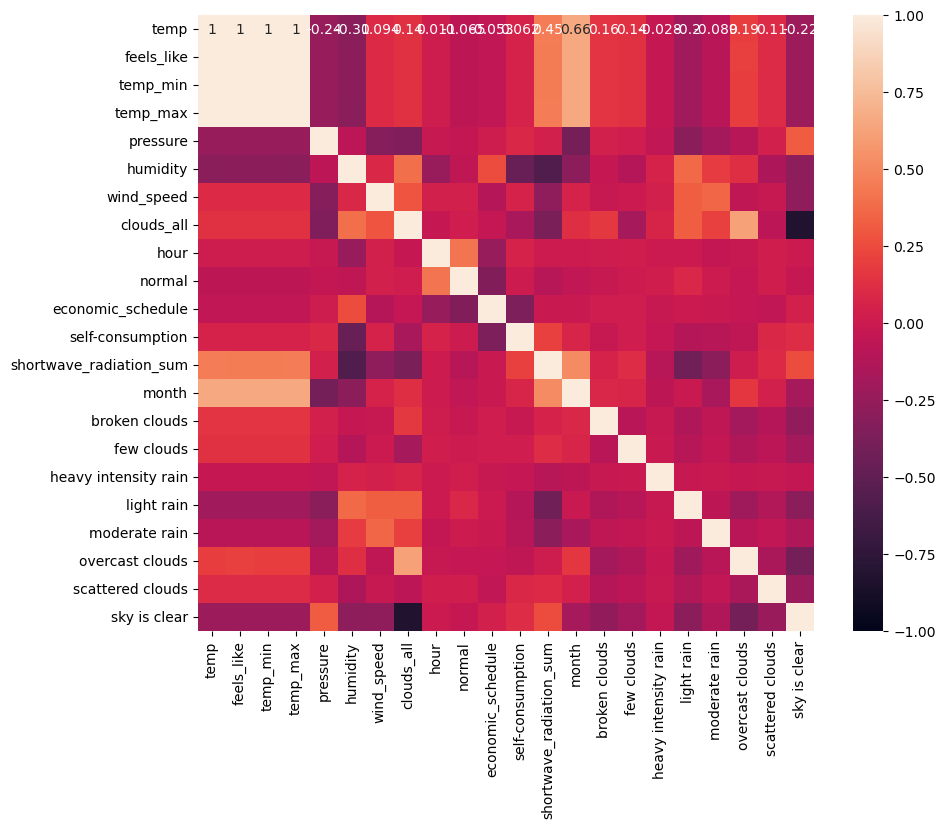

In [132]:
corr_matrix = df.corr(numeric_only=True)
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr_matrix, vmin=-1, vmax=1, square=True, annot=True)

In [133]:
#print(corr_matrix['injection'])